In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import kstest as ks

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv("../data/task1.csv")

In [3]:
data.head()

y        x1        x2        x3  Unnamed: 4
0 -1.021366  0.071339  0.087156  0.069756         NaN
1  1.215775  0.142315  0.173648  0.139173         NaN
2  4.231872  0.212565  0.258819  0.207912         NaN
3 -0.300357  0.281733  0.342020  0.275637         NaN
4  4.877277  0.349464  0.422618  0.342020         NaN

In [4]:
X_overall = sm.add_constant(data.loc[:,'x1':'x3'])
y = data.loc[:,'y']
regression_overall = sm.OLS(y, X_overall).fit()
regression_overall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     294.6
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           2.41e-72
Time:                        10:32:54   Log-Likelihood:                -385.34
No. Observations:                 200   AIC:                             778.7
Df Residuals:                     196   BIC:                             791.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7930      0.121      6.565      0.000       0.555       1.031
x1             1.0846      1.028      1.055      0.293      -0.944       3.113
x2             0.0125      0.185      0.067      0.946      -0.352       0.377
x3             3.9491      1.042      3.788      0.000       1.893       6.005
==============================================================================
Omnibus:                       96.388   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.392
Skew:                           0.087   Prob(JB):                      0.00204
Kurtosis:                       1.793   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

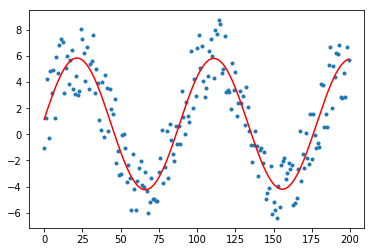

In [5]:
plt.plot(y, '.')
plt.plot(regression_overall.predict(X_overall), 'r');

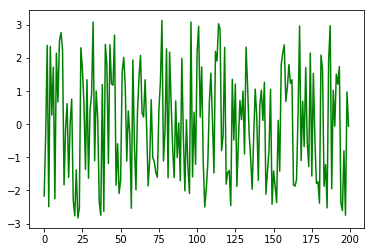

In [6]:
plt.plot(regression_overall.resid, 'g');

In [7]:
X_reduced = sm.add_constant(data.loc[:,'x3'])
regression_reduced = sm.OLS(y, X_reduced).fit()
regression_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     884.9
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           5.53e-75
Time:                        10:33:00   Log-Likelihood:                -386.06
No. Observations:                 200   AIC:                             776.1
Df Residuals:                     198   BIC:                             782.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8168      0.119      6.866      0.000       0.582       1.051
x3             5.0233      0.169     29.747      0.000       4.690       5.356
==============================================================================
Omnibus:                       77.288   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.723
Skew:                           0.107   Prob(JB):                      0.00285
Kurtosis:                       1.833   Cond. No.                         1.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

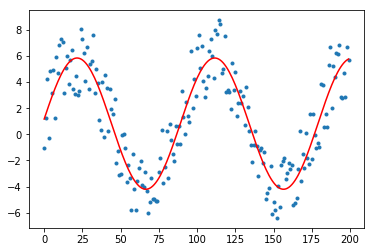

In [8]:
plt.plot(y, '.')
plt.plot(regression_reduced.predict(X_reduced), 'r')

In [9]:
studentized = regression_reduced.resid / regression_reduced.resid.std()

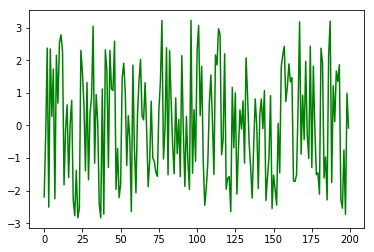

In [10]:
plt.plot(regression_reduced.resid, 'g');

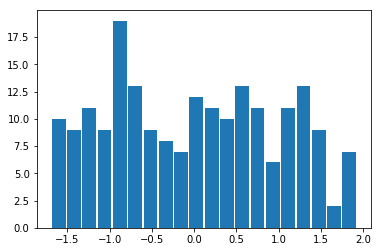

In [11]:
plt.hist(studentized, bins = 20, rwidth=0.9);

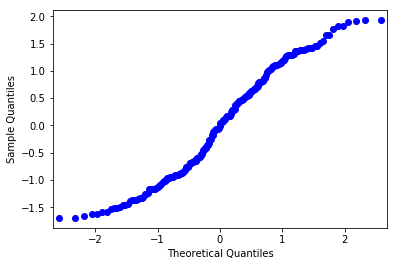

In [12]:
#qq = stats.probplot(studentized, dist="norm")[0]
#plt.plot(qq[0], qq[1], '.');
sm.qqplot(studentized);

In [23]:
left = studentized.min()
right = studentized.max()
ks(studentized, 'uniform', args=(left, right - left))

KstestResult(statistic=0.07657829747131717, pvalue=0.18193336473746635)

In [24]:
ks(studentized, 'norm', args=(0, studentized.std()))

KstestResult(statistic=0.09099504107941803, pvalue=0.06841917507571593)

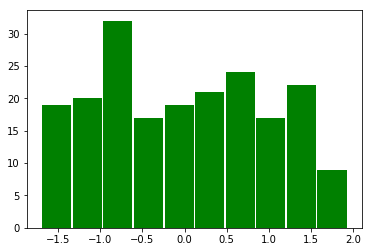

Power_divergenceResult(statistic=37.36727060158508, pvalue=2.2628424391810473e-05)

In [25]:
h = plt.hist(studentized, color='g', rwidth=0.95)
plt.show()

observed = h[0]
breaks = stats.norm.cdf(h[1], 0, studentized.std())
probs = [breaks[i]-breaks[i-1] for i in np.arange(1,len(breaks))]
expected = np.asarray([i*len(y) for i in probs])

chisquare(observed, expected)

In [20]:
mu = len(studentized) / abs(studentized - studentized.median()).sum()
ks(studentized, 'laplace', args=(0, mu))

KstestResult(statistic=0.1147151048198035, pvalue=0.009494571230528992)

In [21]:
ks(studentized, 't', args=(studentized.std()**2,))

KstestResult(statistic=0.16969763551518924, pvalue=1.6672996368205517e-05)

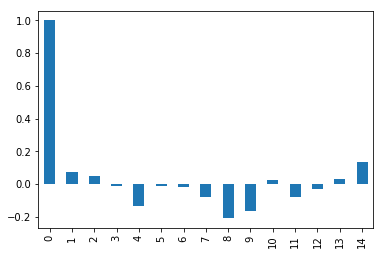

In [22]:
lag = 15
acf = pd.Series([studentized.autocorr(i) for i in range(0, lag)])
acf.plot(kind='bar');